# Part I - (Prosper Loan Data Exploration)
## by (Olamide Olagunju)

## Introduction
In this Exploration we are looking into dataset that contains 113,937 propser loans with the following attributes: loan amount, borrower income, borrower rate ,borrower employment status. This will help us study the loans and the borrowers.The dataset shows that Propser is a lending platform where individuals can either invest or borrow loan. I am trying to look into 3 main questions:

1. Borrower data
2. Loan data
3. Credit Risk metrics 

And i am interested in finding the relation between many variables for examble

1. The affect of the employment status and occupation and monthly salary to the loan amount
2. What are the factors leading to higher current delinquencies rate 
3. Is there any relation between the customer risk score and the loan original amount 

In [23]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Loading data and fast reviewing the structure and its columns type

In [24]:
# loading the dataset
df=pd.read_csv(r"C:\Users\user\Downloads\prosperLoanData.csv")
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?

> The structure of the dataset is 113,937 rows, 81 columns containing data about the loans

### What is/are the main feature(s) of interest in your dataset?

  
> what affects the borrowers APR or interest rate?

> Is people prefere to take loan with specific tearm?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> To better comprehend the data and attempt to identify the most appropriate answers to the key questions, I will study a variety of aspects. Credit Grade, Term, Loan Status, Borrower APR, Lender Yield, ProsperRating (Alpha), ProsperScore, Listing Category, Occupation, Employment Status, Employment Status Duration, Is Borrower Homeowner, Current Delinquencies, Income Range, Stated Monthly Income, Total Prosper Loans, Loan Original Amount, Loan Origination Quarter, and other variables as needed.

## Univariate Exploration

> In this sweection, I will start to see the distribution of each variable and will start by creating functions to not repete the code.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 




In [25]:
#Function to plot a horizontal bar
def plot_horizontal_bar(dataset,columnName):
    color=sb.color_palette()[0]
    column_name_count=dataset[columnName].value_counts()
    plot=sb.countplot(data=dataset,y=columnName,color=color,order=column_name_count.index)
    return(plot)

In [26]:
#function to plot the virtical bar
def plot_vertical_bar(dataset,columnName):
    color=sb.color_palette()[0]
    column_name_count=dataset[columnName].value_counts()
    plot=sb.countplot(data=dataset,x=columnName,color=color,order=column_name_count.index);
    return(plot)

In [27]:
def plot_hist(dataset,columnName,bin_stip):
    bins=np.arange(dataset[columnName].min(),dataset[columnName].max()+bin_stip,bin_stip)
    plot=plt.hist(data=dataset,x=columnName,bins=bins);
    return(plot)

### I would begin by looking over the columns pertaining to the Borrower.

#### 1: Employment Status column
    i would begin by checking many peoples have a job

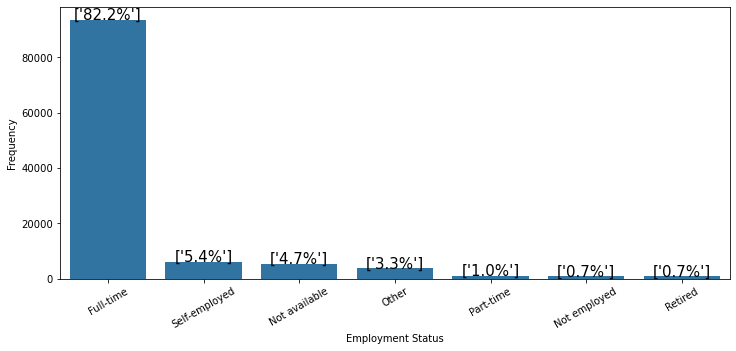

In [43]:
plt.figure(figsize=[12,5])
plot_vertical_bar(df,"EmploymentStatus");
plt.xticks(rotation=30);
plt.xlabel("Employment Status")
plt.ylabel("Frequency")


# ploting the percentage above each column
column_count=df["EmploymentStatus"].value_counts()
locs,labels=plt.xticks(rotation = 30)
for loc,label in zip(locs,labels):
    count=column_count[label.get_text()]
    pct_string=["{:0.1f}%".format(100*count/df.shape[0])]
    plt.text(loc,count+2,pct_string,ha="center",fontsize=15)


In [29]:
#replacing the word Employed by Full-time
df['EmploymentStatus'] = df['EmploymentStatus'].replace(['Employed'],'Full-time')

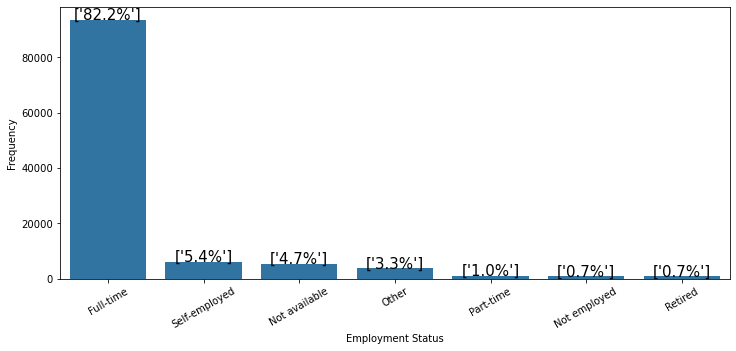

In [44]:
plt.figure(figsize=[12,5])
plot_vertical_bar(df,"EmploymentStatus");
plt.xticks(rotation=30);
plt.xlabel("Employment Status")
plt.ylabel("Frequency")

# ploting the percentage above each column
column_count=df["EmploymentStatus"].value_counts()
locs,labels=plt.xticks(rotation = 30)
for loc,label in zip(locs,labels):
    count=column_count[label.get_text()]
    pct_string=["{:0.1f}%".format(100*count/df.shape[0])]
    plt.text(loc,count+2,pct_string,ha="center",fontsize=15)

>From this graph we can note that around 82% have a full time job 

#### 2: Income Range column

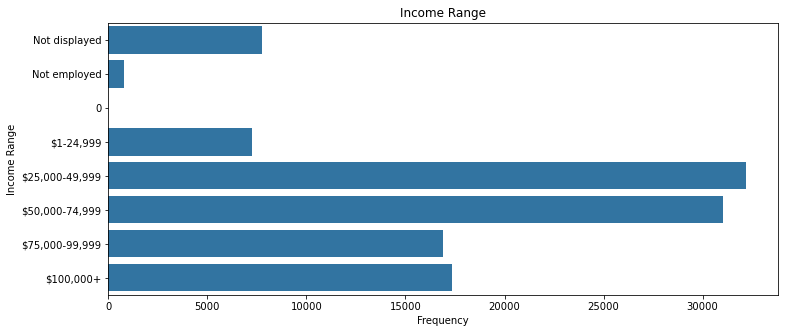

In [45]:
#making the order list for the graph 
order_list=["Not displayed","Not employed","0","$1-24,999","$25,000-49,999","$50,000-74,999","$75,000-99,999","$100,000+"]

#ploting the bar chart
plt.figure(figsize=[12,5])
color=sb.color_palette()[0]
sb.countplot(data=df,y="IncomeRange",color=color,order=order_list);

#labels and title
plt.xlabel("Frequency")
plt.ylabel("Income Range")
plt.title("Income Range");

In [32]:
(df["IncomeRange"].value_counts()/df.shape[0])*100

$25,000-49,999    28.254211
$50,000-74,999    27.251902
$100,000+         15.216304
$75,000-99,999    14.846801
Not displayed      6.794106
$1-24,999          6.384230
Not employed       0.707408
$0                 0.545038
Name: IncomeRange, dtype: float64

> Around 28% of people have income range between 25,000-49,999 and 27% have income range between 50,000-74,999

#### 3: Stated Monthly Income column

In [33]:
df["StatedMonthlyIncome"].describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

Text(0, 0.5, 'Frequency')

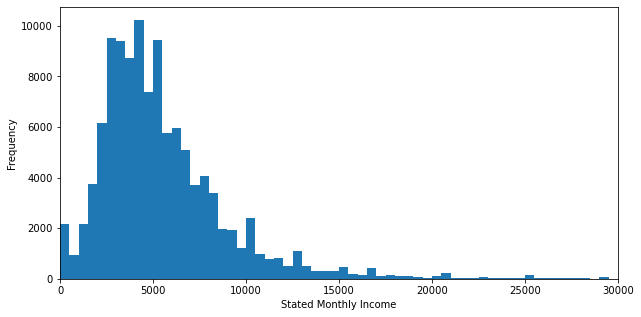

In [46]:
plt.figure(figsize=[10,5])
# making limit in x axis 
bins=np.arange(0,df["StatedMonthlyIncome"].max()+500,500)
plt.hist(data=df,x="StatedMonthlyIncome",bins=bins);
plt.xlim(0,30000);

#labels and title
plt.xlabel("Stated Monthly Income")
plt.ylabel("Frequency")

#### 4. Occupation column

In [35]:
# making new dataframe to contian the most frequently occupations to avoid crawding
Occupation_frequency=df["Occupation"].value_counts()
ind=np.sum(Occupation_frequency>500) #will select the possitions repeted more than 500 times
most_Occupation=Occupation_frequency.index[:ind]
new_df=df[df["Occupation"].isin(most_Occupation)]

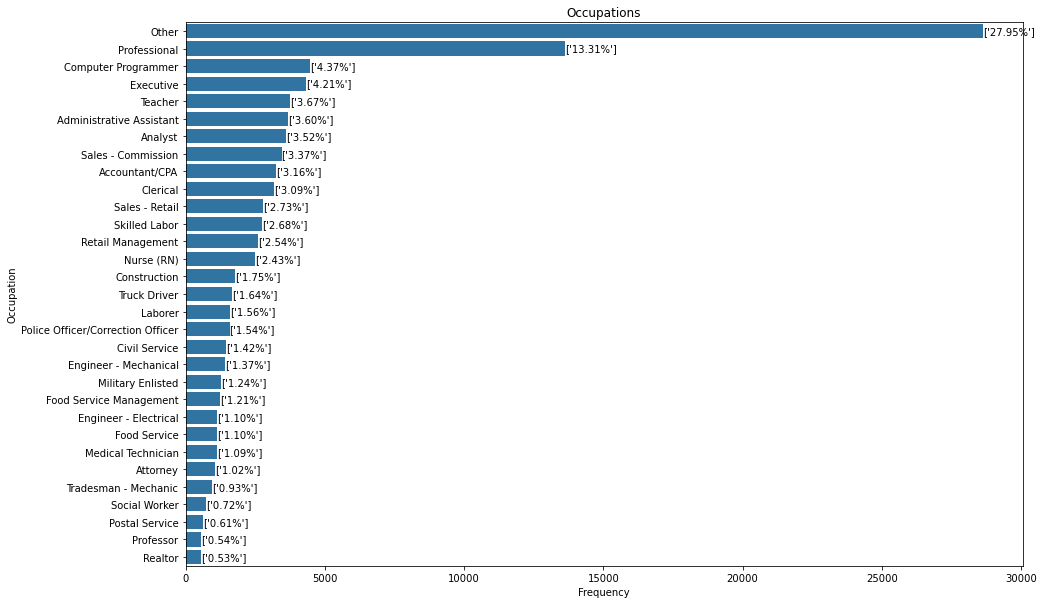

In [47]:
#ploting the bar chart
plt.figure(figsize=[15,10])
plot_horizontal_bar(new_df,"Occupation")

#labels and title
plt.xlabel("Frequency")
plt.ylabel("Occupation")
plt.title("Occupations");

#add % at the end of each bar
occupation_count=new_df["Occupation"].value_counts()
for i in range(occupation_count.shape[0]):
    count=occupation_count[i]
    pct_string=["{:0.2f}%".format(100*count/new_df.shape[0])]
    plt.text(count+1,i,pct_string,va="center")

> computer programmer are the most know position that are taking loan

#### 5. Borrower Home owner 

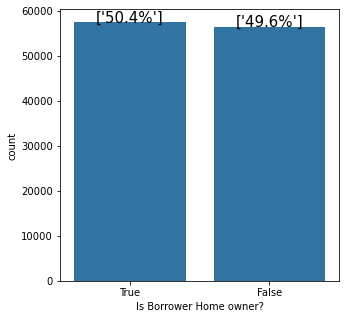

In [51]:
plt.figure(figsize=[5,5])
plot_vertical_bar(df,"IsBorrowerHomeowner");
plt.xlabel("Is Borrower Home owner?")

# ploting the percentage above each column
df["IsBorrowerHomeowner"]=df["IsBorrowerHomeowner"].astype(str)
column_count=df["IsBorrowerHomeowner"].value_counts()
locs,labels=plt.xticks()
for loc,label in zip(locs,labels):
    count=column_count[label.get_text()]
    pct_string=["{:0.1f}%".format(100*count/df.shape[0])]
    plt.text(loc,count+2,pct_string,ha="center",fontsize=15);

> The distribution of stated that half of people have home

#### 6. Debt To Income Ratio 
> Explore the distribution of the debt to income ratio
   

In [19]:
df["DebtToIncomeRatio"].describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

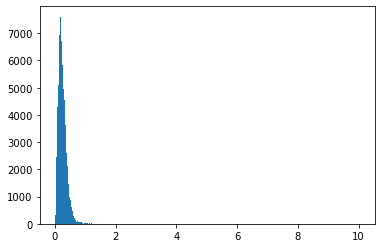

In [54]:
#plot the frequency of the debt to income ration
plot_hist(df,"DebtToIncomeRatio",0.02);

In [55]:
# making a dataframe contains number less than one
debt_df=df[df["DebtToIncomeRatio"]<=1]

Text(0, 0.5, 'Frequency')

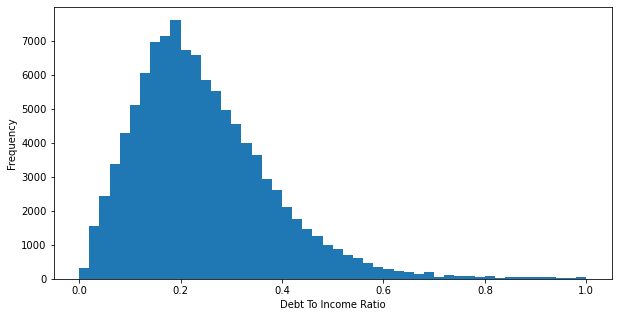

In [57]:
plt.figure(figsize=[10,5])

# ploting the new values
plot_hist(debt_df,"DebtToIncomeRatio",0.02);

# lables and title for the graph
plt.xlabel("Debt To Income Ratio")
plt.ylabel("Frequency")

#### 7. Total Prosper Loans 

In [59]:
#converting the column type to str
df["TotalProsperLoans"]=df["TotalProsperLoans"].astype(str)

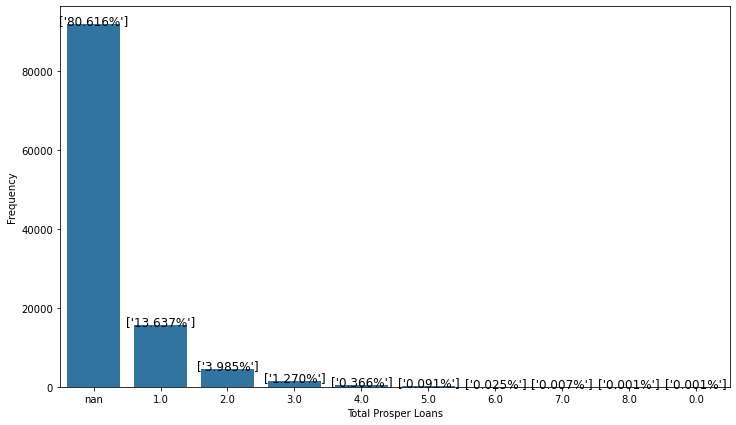

In [60]:
plt.figure(figsize=[12,7])
plot_vertical_bar(df,"TotalProsperLoans");

# labels and title
plt.xlabel("Total Prosper Loans")
plt.ylabel("Frequency")

column_count=df["TotalProsperLoans"].value_counts()
locs,labels=plt.xticks()
for loc,label in zip(locs,labels):
    count=column_count[label.get_text()]
    pct_string=["{:0.3f}%".format(100*count/df.shape[0])]
    plt.text(loc,count,pct_string,ha="center",fontsize=12)

> 80% of the people don't have past loans

### We will now look into the loan-related columns.

#### 1: Listing Category
   

In [61]:
# making the list
listing_cat={0:"Not Available",1:"Debt Consolidation",2:"Home Improvement", 3 :"Business", 4:"Personal Loan",
             5: "Student Use", 6:"Auto", 7:"Other", 8:"Baby&Adoption",
             9 :"Boat", 10:"Cosmetic Procedure", 11:"Engagement Ring", 12:"Green Loans",
             13:"Household Expenses", 14:"Large Purchases", 15:"Medical/Dental",
             16:"Motorcycle", 17:"RV", 18:"Taxes", 19:"Vacation", 20:"Wedding Loans"}

In [62]:
# remaping the keys with values from the dic
df["ListingCategory (numeric)"]=df["ListingCategory (numeric)"].map(listing_cat) 

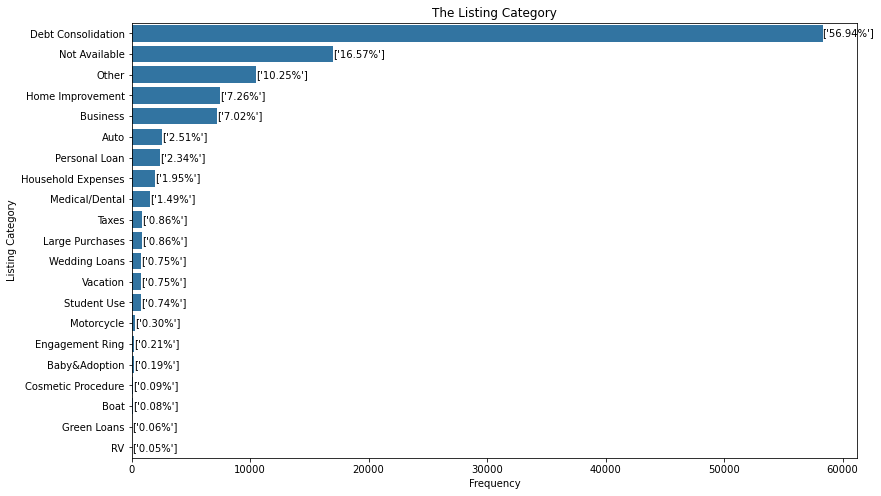

In [64]:
#ploting the bar chart
plt.figure(figsize=[13,8])
plot_horizontal_bar(df,"ListingCategory (numeric)")

#labels and title
plt.xlabel("Frequency")
plt.ylabel("Listing Category")
plt.title("The Listing Category");

#add % at the end of each bar
column_count=df["ListingCategory (numeric)"].value_counts()
for i in range(column_count.shape[0]):
    count=column_count[i]
    pct_string=["{:0.2f}%".format(100*count/new_df.shape[0])]
    plt.text(count+1,i,pct_string,va="center")
  


> 7.26 % and 7.02 %, respectively, came from business and residential renovation.

#### 2: The lenght of the loan per month

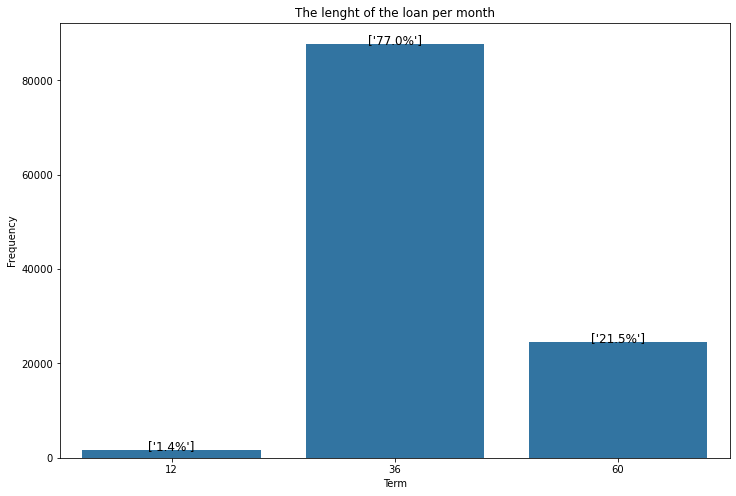

In [65]:
plt.figure(figsize=[12,8])
df["Term"]=df["Term"].astype(str)
order=["12","36","60"]
color=sb.color_palette()[0]
sb.countplot(data=df,x="Term",order=order,color=color)

#labels and title
plt.xlabel("Term")
plt.ylabel("Frequency")
plt.title("The lenght of the loan per month");

term_count=df["Term"].value_counts()
locs,labels=plt.xticks()
for loc,label in zip(locs,labels):
    count=term_count[label.get_text()]
    pct_string=["{:0.1f}%".format(100*count/df.shape[0])]
    plt.text(loc,count+2,pct_string,ha="center",fontsize=12)

> This graph shows that approximately 77% of consumers prefer to take out a 36-month loan.

#### 3. Loan Status  

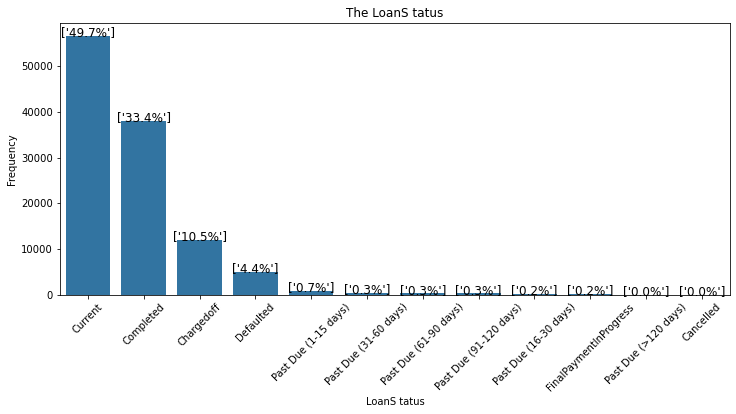

In [66]:
plt.figure(figsize=[12,5])
plot_vertical_bar(df,"LoanStatus");

#labels and title
plt.xlabel("LoanS tatus")
plt.ylabel("Frequency")
plt.title("The LoanS tatus");

term_count=df["LoanStatus"].value_counts()
locs,labels=plt.xticks(rotation = 45)
for loc,label in zip(locs,labels):
    count=term_count[label.get_text()]
    pct_string=["{:0.1f}%".format(100*count/df.shape[0])]
    plt.text(loc,count+2,pct_string,ha="center",fontsize=12)

> Current loans is the most frequently status with around 50% second by completed

#### 4. Loan Origination Date  

In [67]:
#converting loan original date to date time type
df["LoanOriginationDate"]=pd.to_datetime(df["LoanOriginationDate"])

In [68]:
# extracting the quarter from the date time column 
df['quarter'] = pd.PeriodIndex(df["LoanOriginationDate"], freq='Q')

In [69]:
# sorting the quarter column 
df.sort_values(by=['quarter'], inplace=True)

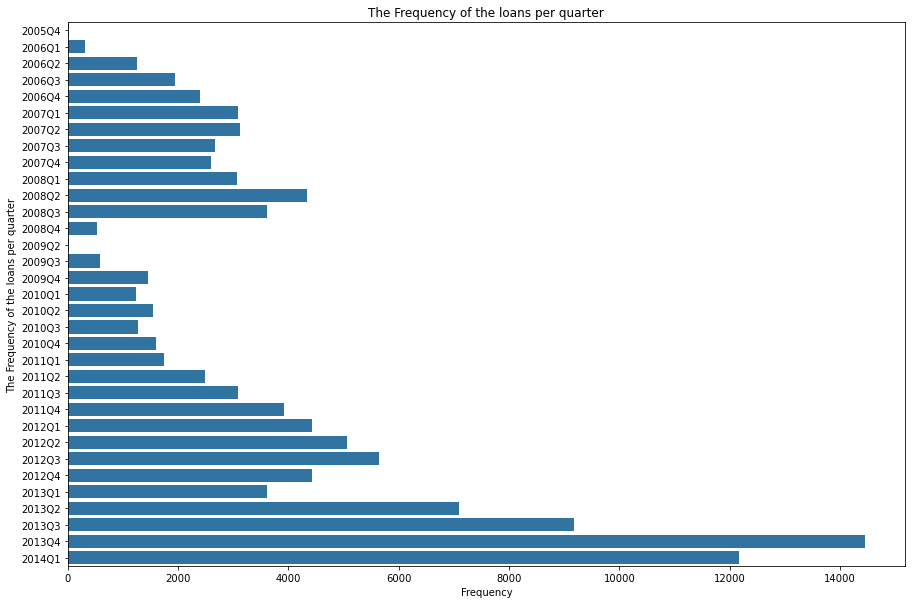

In [71]:
#ploting the bar chart
plt.figure(figsize=[15,10])
color=sb.color_palette()[0]
sb.countplot(data=df,y="quarter",color=color);

#labels and title
plt.xlabel("Frequency")
plt.ylabel("The Frequency of the loans per quarter");
plt.title("The Frequency of the loans per quarter");

#### 5: Loan Original Amount  

In [74]:
df["LoanOriginalAmount"].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

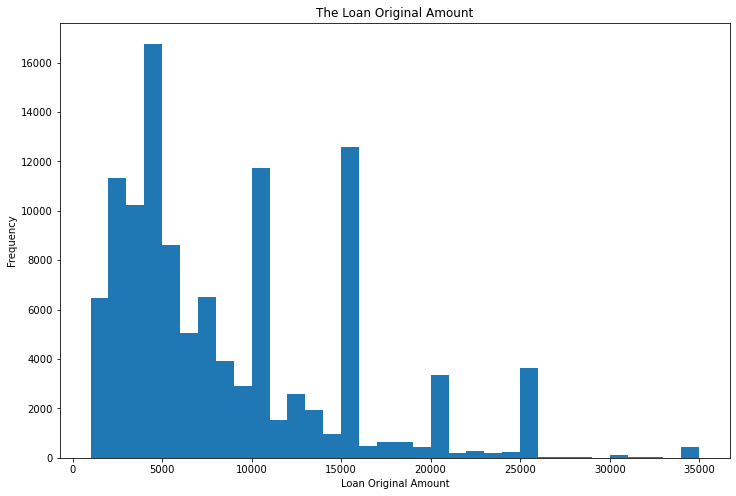

In [76]:
plt.figure(figsize=[12,8])
plot_hist(df,"LoanOriginalAmount",1000);

#labels and title
plt.xlabel("Loan Original Amount")
plt.ylabel("Frequency")
plt.title("The Loan Original Amount");

> The most of people are interested in taking loans with fixid amunt like 5K, 10K, 15K, and so on 

#### 6. Monthly Loan Payment  

In [36]:
df["MonthlyLoanPayment"].describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

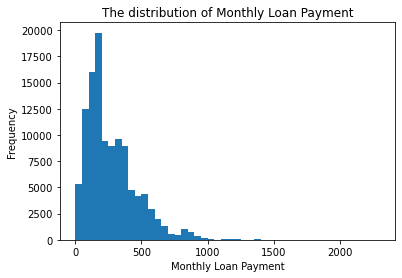

In [77]:
plot_hist(df,"MonthlyLoanPayment",50);

#labels and title
plt.xlabel("Monthly Loan Payment")
plt.ylabel("Frequency")
plt.title("The distribution of Monthly Loan Payment");

> Skewed and we have beak around 210$

### Would now explore the credit Risk metrics

#### 1: The prosper rating (alpha)
> Lets check What is the prosper rating distribution

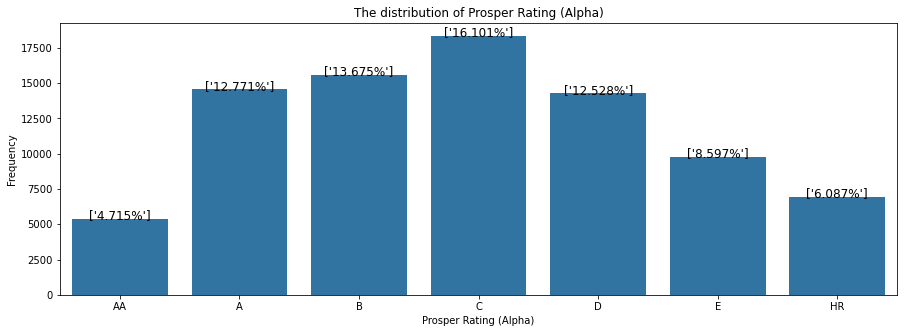

In [79]:
plt.figure(figsize=[15,5])
color=sb.color_palette()[0]
order=["AA","A","B","C","D","E","HR"]
sb.countplot(data=df,x="ProsperRating (Alpha)",color=color,order=order)

#labels and title
plt.xlabel("Prosper Rating (Alpha)")
plt.ylabel("Frequency")
plt.title("The distribution of Prosper Rating (Alpha)");

column_count=df["ProsperRating (Alpha)"].value_counts()
locs,labels=plt.xticks()
for loc,label in zip(locs,labels):
    count=column_count[label.get_text()]
    pct_string=["{:0.3f}%".format(100*count/df.shape[0])]
    plt.text(loc,count+2,pct_string,ha="center",fontsize=12)

> Aroung 16% have a category C which is equal to 6.00–8.99%

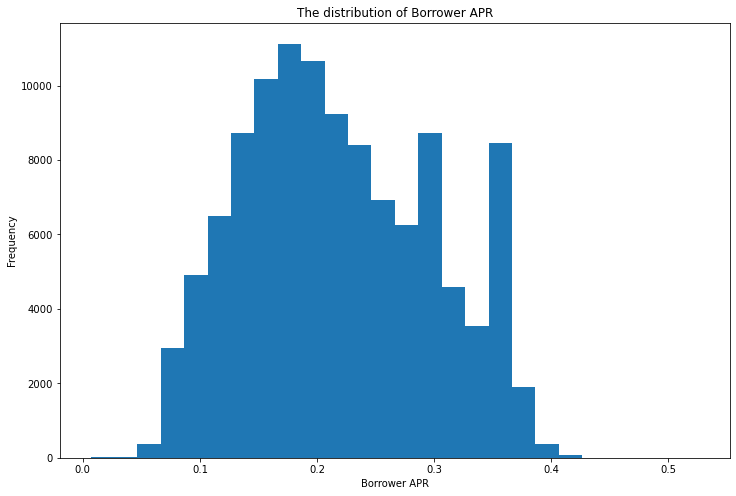

In [82]:
plt.figure(figsize=[12,8])

plot_hist(df,"BorrowerAPR",0.02);

#labels and title
plt.xlabel("Borrower APR")

plt.ylabel("Frequency")
plt.title("The distribution of Borrower APR");

> The distribution is normaly and we have a beak around 0.2

#### 3. The Borrower Rate

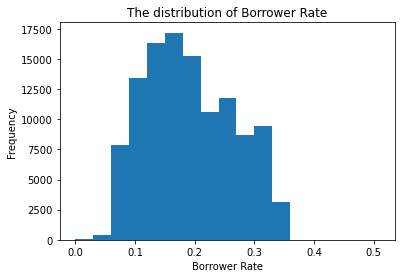

In [83]:
plot_hist(df,"BorrowerRate",0.03);

#labels and title
plt.xlabel("Borrower Rate")
plt.ylabel("Frequency")
plt.title("The distribution of Borrower Rate");

> The distribution is normaly and the peak is between 0.1 nad 0.2

#### 4. The Lender Yield

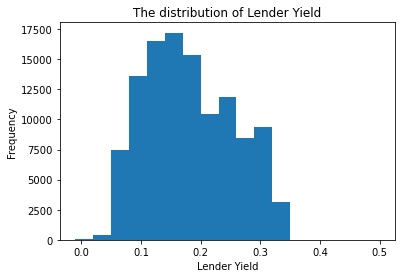

In [84]:
plot_hist(df,"LenderYield",0.03);

#labels and title
plt.xlabel("Lender Yield")
plt.ylabel("Frequency")
plt.title("The distribution of Lender Yield");

> The distribution is normally and we have a peak between 0.1 and 0.2

#### 5. The Open Credit Lines

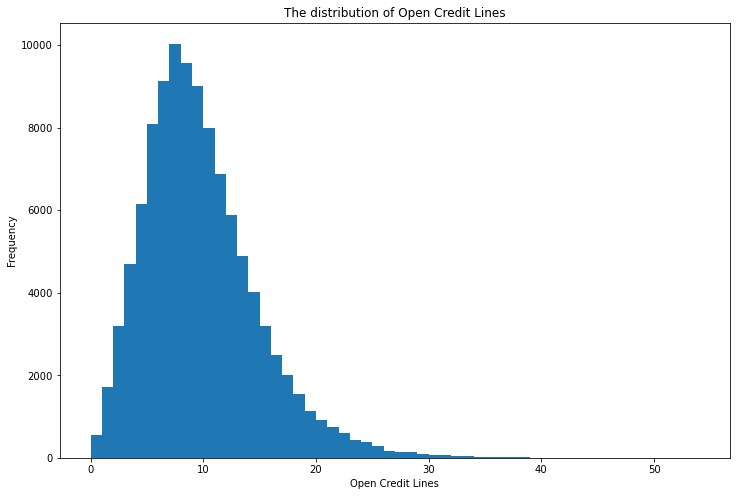

In [85]:
plt.figure(figsize=[12,8])
plot_hist(df,"OpenCreditLines",1);

plt.xlabel("Open Credit Lines")
plt.ylabel("Frequency")
plt.title("The distribution of Open Credit Lines");

> The distribution seems like right skewed and we have a beak between 7 and 10

#### 6. The Amount Delinquent
    I am interesting to know the distribution of Amount Delinquent?

In [43]:
df["AmountDelinquent"].describe()

count    106315.000000
mean        984.507059
std        7158.270157
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      463881.000000
Name: AmountDelinquent, dtype: float64

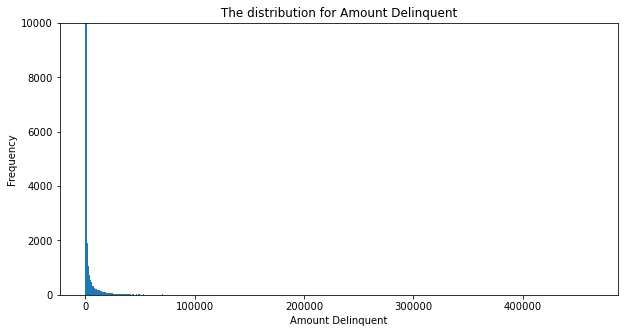

In [86]:
plt.figure(figsize=[10,5])
plot_hist(df,"AmountDelinquent",1000);
plt.ylim(0,10000)

# lables and title for the graph
plt.xlabel("Amount Delinquent");
plt.ylabel("Frequency");
plt.title(" The distribution for Amount Delinquent ");

In [45]:
np.log(df["AmountDelinquent"].describe())

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    11.574162
mean      6.892141
std       8.876024
min           -inf
25%           -inf
50%           -inf
75%           -inf
max      13.047383
Name: AmountDelinquent, dtype: float64

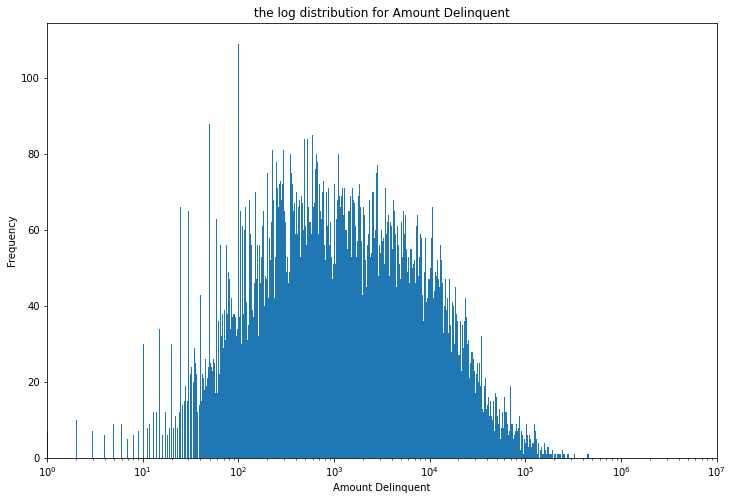

In [46]:
plt.figure(figsize=[12,8]);
#implementing the log scale
bins=10**np.arange(0,13+1,0.01);
plt.hist(data=df,x="AmountDelinquent",bins=bins);
plt.xscale("log");
# making limit for the x axis to get bitter insites
plt.xlim(1e0,1e7);

# lables and title for the graph
plt.xlabel("Amount Delinquent");
plt.ylabel("Frequency");
plt.title(" the log distribution for Amount Delinquent ");

> Normaly distributed and the peak is around 1K

#### 7. The Loan Current Days Delinquent

In [87]:
df["LoanCurrentDaysDelinquent"].describe()

count    113937.000000
mean        152.816539
std         466.320254
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        2704.000000
Name: LoanCurrentDaysDelinquent, dtype: float64

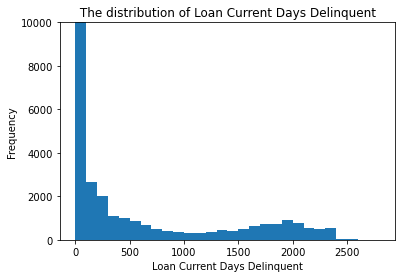

In [88]:
plot_hist(df,"LoanCurrentDaysDelinquent",100);

#making limit to y axis to help us to see the distribution 
plt.ylim(0,10000);

# lables and title for the graph
plt.xlabel("Loan Current Days Delinquent");
plt.ylabel("Frequency");
plt.title(" The distribution of Loan Current Days Delinquent ");

> Most of the delinquent people is less than 500 days delinque

#### 8. The Prosper Score    

In [49]:
df["ProsperScore"].describe()

count    84853.000000
mean         5.950067
std          2.376501
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: ProsperScore, dtype: float64

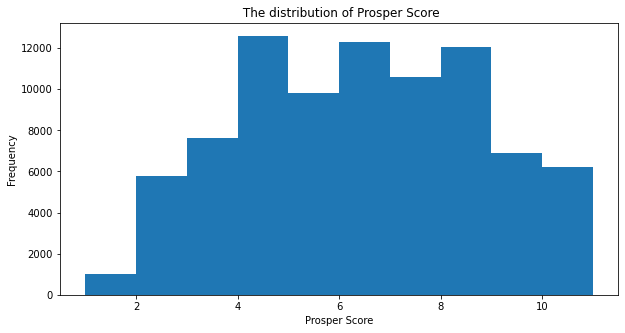

In [89]:
plt.figure(figsize=[10,5])
plot_hist(df,"ProsperScore",1);

# lables and title for the graph
plt.xlabel("Prosper Score");
plt.ylabel("Frequency");
plt.title(" The distribution of Prosper Score");

> The highest prosper score is 4

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I performed some transformations like changing the column types to be categorical values for examble (TotalProsperLoans)
and we notesed some outliers and we deal with them using axis lim() function 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

In some numerical distribution we found that it had long tail which prevent us from taking useful insites so i used the log transformation scale.

## Bivariate Exploration

> In this part, Iwant to investigate relationships between pairs of variables in dataset.

#### 1: The relation between all numeric variables

In [51]:
quant_vars=["StatedMonthlyIncome","DebtToIncomeRatio","LoanOriginalAmount","MonthlyLoanPayment","BorrowerAPR","BorrowerRate","LenderYield","OpenCreditLines","AmountDelinquent","LoanCurrentDaysDelinquent","ProsperScore"]

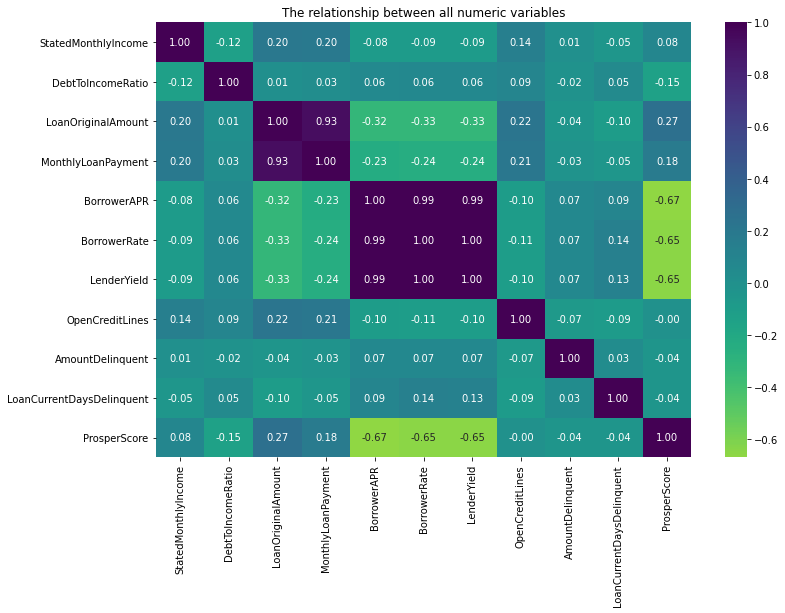

In [52]:
#ploting the correlation heat map between the quantitative selected variables
plt.figure(figsize=[12,8])
sb.heatmap(df[quant_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'viridis_r', center = 0)
#title
plt.title("The relationship between all numeric variables");

1. The Loan original amount has a strong positive relationship with the monthly loan payment
2. The borrower APR has a strong positive relationship with the lenderyield
3. The prosber score has a negative relationship with borrower APR and lenderyeild
4. The Loan original amount has a negative relationship with borrower Rate and lenderyeild but not strongly

#### 2. The relation between Loan Original Amount and Monthly Loan Payment

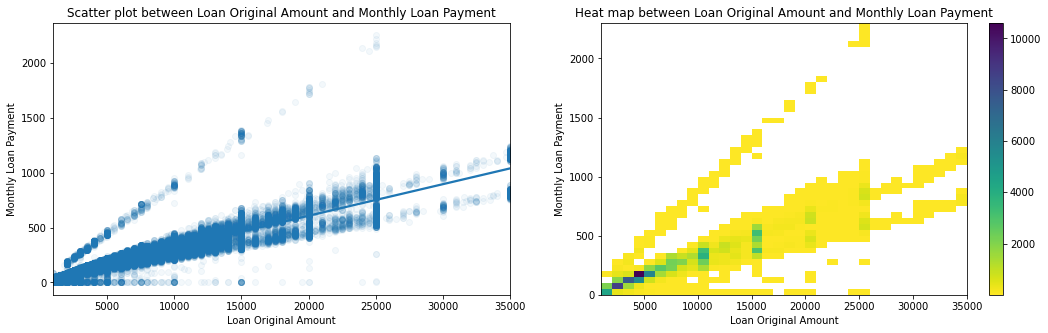

In [53]:
plt.figure(figsize = [18, 5])

plt.subplot(1, 2, 1)
sb.regplot(data=df,x="LoanOriginalAmount",y="MonthlyLoanPayment",scatter_kws={"alpha":1/20});
plt.xlabel("Loan Original Amount");
plt.ylabel("Monthly Loan Payment");
plt.title("Scatter plot between Loan Original Amount and Monthly Loan Payment");

plt.subplot(1, 2, 2)
x_bin = np.arange(df['LoanOriginalAmount'].min(), df['LoanOriginalAmount'].max()+1000,1000)
y_bin = np.arange(df['MonthlyLoanPayment'].min(), df['MonthlyLoanPayment'].max()+50, 50)
plt.hist2d(data = df, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', bins = [x_bin, y_bin], cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();
plt.xlabel("Loan Original Amount");
plt.ylabel("Monthly Loan Payment");
plt.title("Heat map between Loan Original Amount and Monthly Loan Payment");

> The relation between loan original amount and monthly loan payment is strongly positive in poth heat map and scatter plot 

#### 3: The relation between Borrower APR and Lender Yield

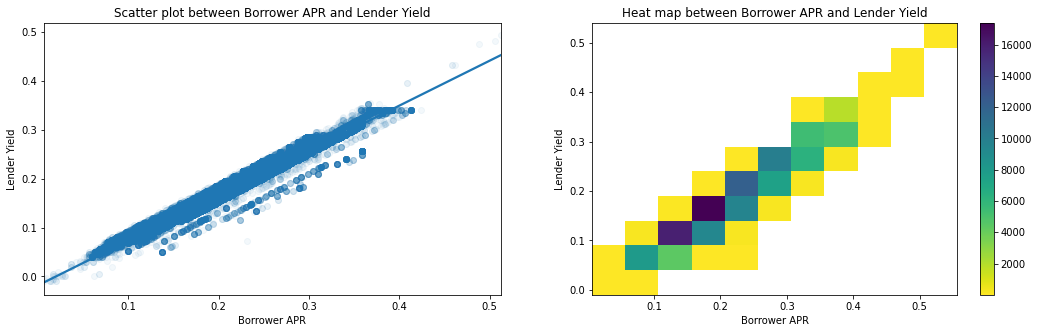

In [54]:
plt.figure(figsize = [18, 5])

plt.subplot(1, 2, 1)
sb.regplot(data=df,x="BorrowerAPR",y="LenderYield",scatter_kws={"alpha":1/20});
plt.xlabel("Borrower APR");
plt.ylabel("Lender Yield");
plt.title("Scatter plot between Borrower APR and Lender Yield");

plt.subplot(1, 2, 2)
x_bin = np.arange(df['BorrowerAPR'].min(), df['BorrowerAPR'].max()+0.05,0.05)
y_bin = np.arange(df['LenderYield'].min(), df['LenderYield'].max()+0.05,0.05)
plt.hist2d(data = df, x = 'BorrowerAPR', y = 'LenderYield', bins = [x_bin, y_bin], cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();
plt.xlabel("Borrower APR");
plt.ylabel("Lender Yield");
plt.title("Heat map between Borrower APR and Lender Yield");

> The relation between Borrower APR and Lendr yield is strongly positive in poth heat map and scatter plot 

#### 4: The relation between Prosper Scoreand Borrower APR

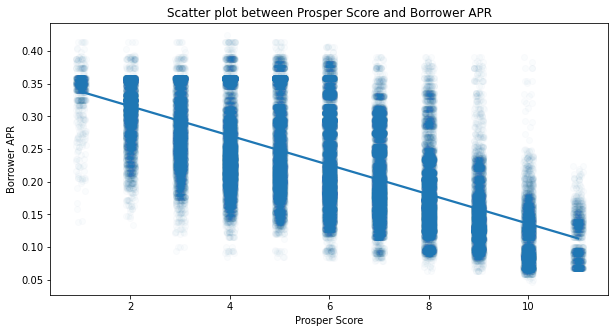

In [55]:
plt.figure(figsize = [10, 5])
sb.regplot(data=df,x="ProsperScore",y="BorrowerAPR",scatter_kws={"alpha":1/50},x_jitter=0.1);
plt.xlabel("Prosper Score");
plt.ylabel("Borrower APR");
plt.title("Scatter plot between Prosper Score and Borrower APR");

> We had a strongly negative relationship between Borrower APR and Prosper Score

#### 5. The relation between Loan Original Amount and Borrower Rate

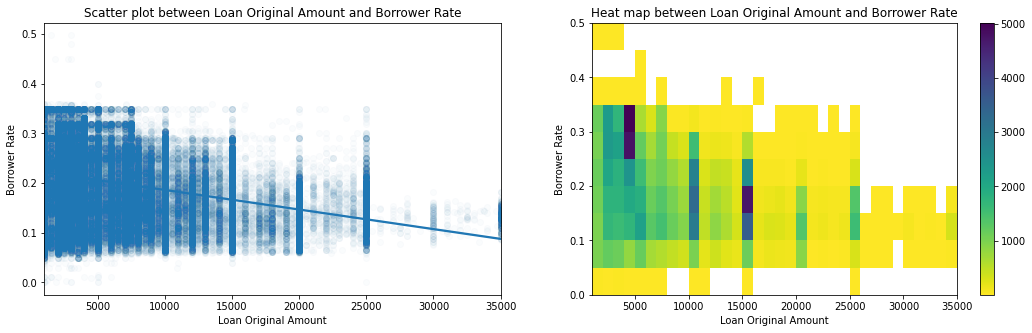

In [56]:
plt.figure(figsize = [18, 5])

plt.subplot(1, 2, 1)
sb.regplot(data=df,x="LoanOriginalAmount",y="BorrowerRate",scatter_kws={"alpha":1/50});
plt.xlabel("Loan Original Amount");
plt.ylabel("Borrower Rate");
plt.title("Scatter plot between Loan Original Amount and Borrower Rate");

plt.subplot(1, 2, 2)
x_bin = np.arange(df['LoanOriginalAmount'].min(), df['LoanOriginalAmount'].max()+1000,1000)
y_bin = np.arange(df['BorrowerRate'].min(), df['BorrowerRate'].max()+0.05, 0.05)
plt.hist2d(data = df, x = 'LoanOriginalAmount', y = 'BorrowerRate', bins = [x_bin, y_bin], cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();
plt.xlabel("Loan Original Amount");
plt.ylabel("Borrower Rate");
plt.title("Heat map between Loan Original Amount and Borrower Rate");

> The relation between Loan Original Amount and Borrower Rate is negative but not strongly

#### The relation between Term (The length of the loan per month) and Borrower APR

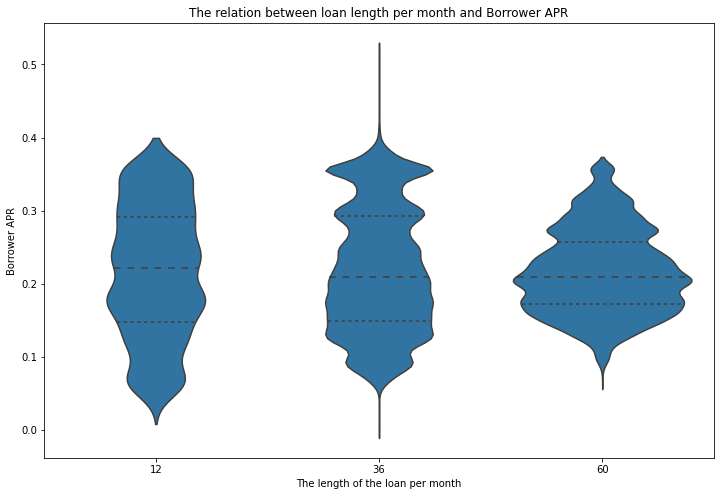

In [92]:
term=["12","36","60"]
tclasses=pd.api.types.CategoricalDtype(ordered=True,categories=term)
df["Term"]=df["Term"].astype(tclasses)

plt.figure(figsize = [12, 8])
color=sb.color_palette()[0]
sb.violinplot(data=df,x="Term",y="BorrowerAPR",color=color,inner="quartile")
# labels and title
plt.xlabel("The length of the loan per month");
plt.ylabel("Borrower APR");
plt.title("The relation between loan length per month and Borrower APR");

> 36 months loan has a wider range of Borrower APR but we need to focus more so we will apply the FacetGrid 

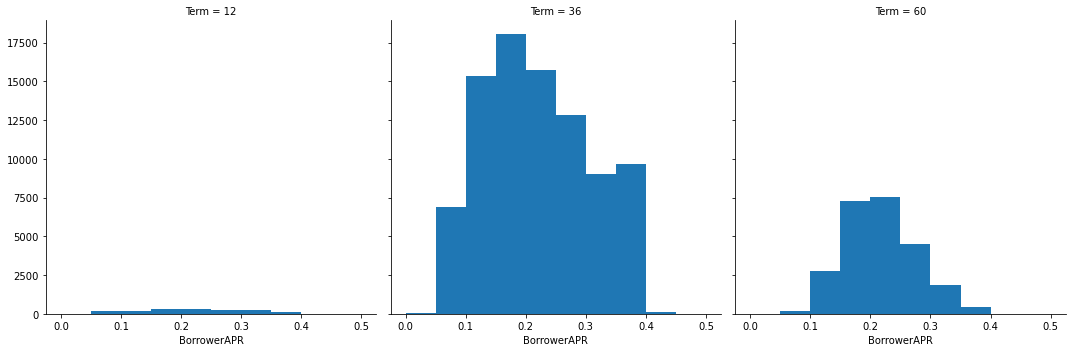

In [93]:
bin_edge=np.arange(0,0.5+0.05,.05)
g=sb.FacetGrid(data=df,col="Term",height=5);
g.map(plt.hist,"BorrowerAPR",bins=bin_edge);

> Now it's look more clearly 36 months has the wider borrower APR and also has more frequency comparing with 12, 60 months

#### 7. The relation between Loan Original Amount and Listing Category

In [94]:
my_order = df.groupby(by=["ListingCategory (numeric)"])["LoanOriginalAmount"].median().sort_values().iloc[::-1].index
my_order

Index(['Debt Consolidation', 'Baby&Adoption', 'Wedding Loans', 'Business',
       'Boat', 'Engagement Ring', 'Large Purchases', 'Home Improvement', 'RV',
       'Green Loans', 'Taxes', 'Not Available', 'Medical/Dental', 'Motorcycle',
       'Vacation', 'Household Expenses', 'Other', 'Cosmetic Procedure', 'Auto',
       'Personal Loan', 'Student Use'],
      dtype='object', name='ListingCategory (numeric)')

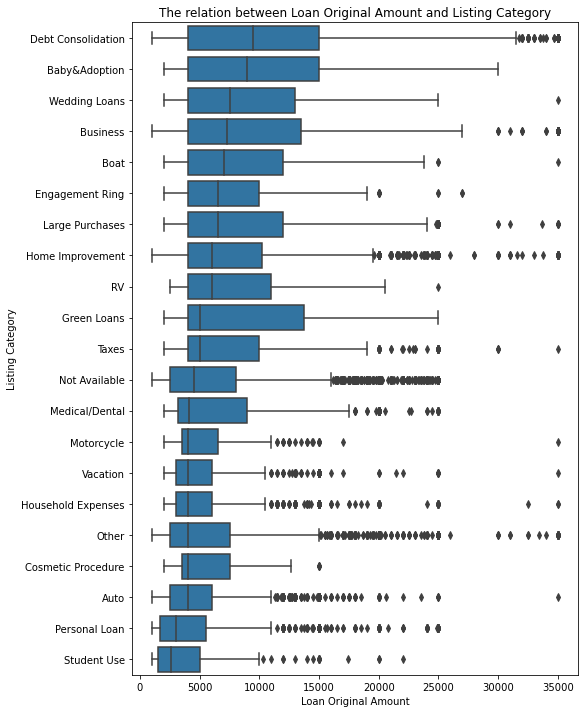

In [95]:
plt.figure(figsize=[8,12])
color=sb.color_palette()[0]

my_order = df.groupby(by=["ListingCategory (numeric)"])["LoanOriginalAmount"].median().sort_values().iloc[::-1].index

sb.boxplot(data=df,y="ListingCategory (numeric)",x="LoanOriginalAmount",color=color,order=my_order);
plt.xlabel("Loan Original Amount");
plt.ylabel("Listing Category");
plt.title("The relation between Loan Original Amount and Listing Category");

> We can notice that (Debt consolidation) has a highest median and (student use) has a lowest median 

#### 8. The relation between Occupation and Loan Original Amount

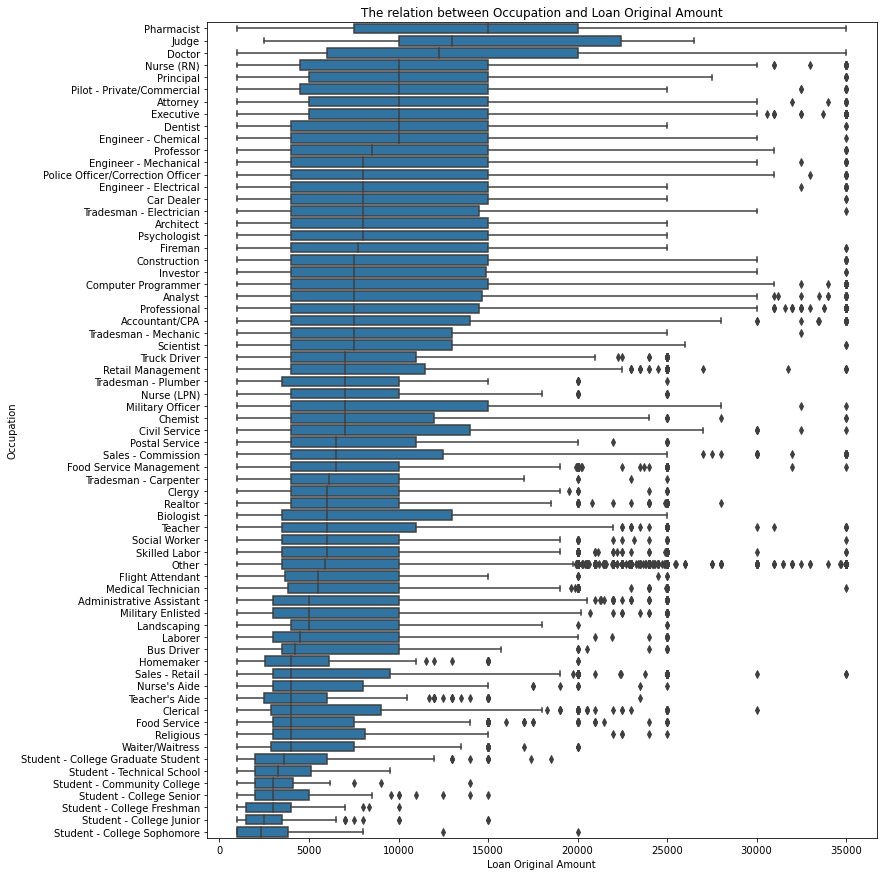

In [96]:
plt.figure(figsize=[12,15])
color=sb.color_palette()[0]

my_order = df.groupby(by=["Occupation"])["LoanOriginalAmount"].median().sort_values().iloc[::-1].index

sb.boxplot(data=df,y="Occupation",x="LoanOriginalAmount",color=color,order=my_order)
# sitting labeles and title
plt.ylabel("Occupation");
plt.xlabel("Loan Original Amount");
plt.title("The relation between Occupation and Loan Original Amount");

> Students take a loan with less amount and the pharmacist the higher

#### 9:The relation between Employment status and Borrower APR

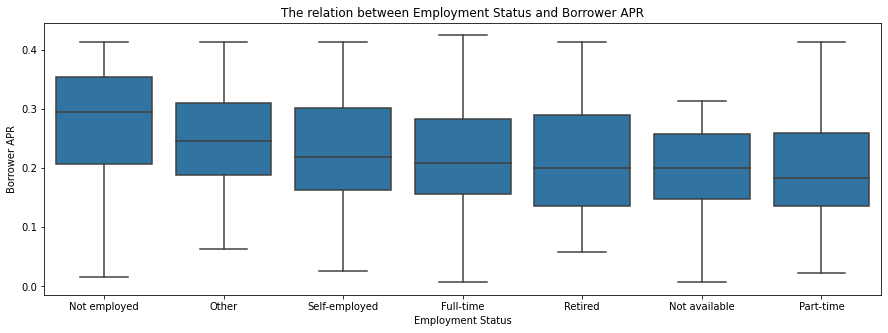

In [97]:
plt.figure(figsize=[15,5])
color=sb.color_palette()[0]

my_order = df.groupby(by=["EmploymentStatus"])["BorrowerAPR"].median().sort_values().iloc[::-1].index

sb.boxplot(data=df,x="EmploymentStatus",y="BorrowerAPR",color=color,order=my_order)
# sitting labeles and title
plt.xlabel("Employment Status");
plt.ylabel("Borrower APR");
plt.title("The relation between Employment Status and Borrower APR");

> Not employed has a lighest median and part-time has the lowest median full-time has the widest range in the Borrower APR

#### 10. The relation between  Loan Status and Borrower APR

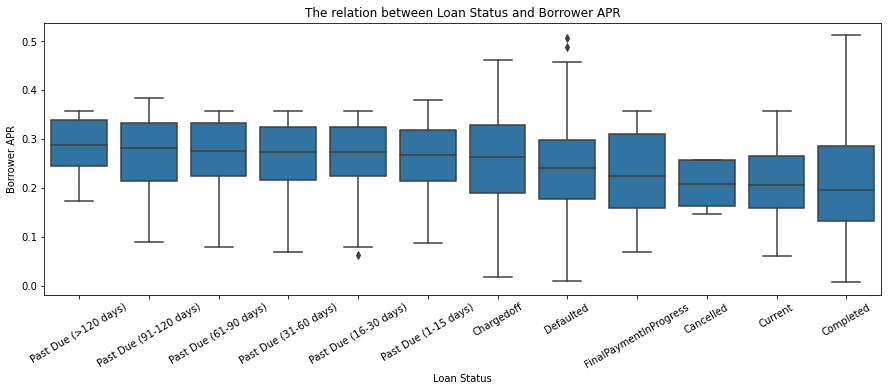

In [98]:
plt.figure(figsize=[15,5])
color=sb.color_palette()[0]

my_order = df.groupby(by=["LoanStatus"])["BorrowerAPR"].median().sort_values().iloc[::-1].index

sb.boxplot(data=df,y="BorrowerAPR",x="LoanStatus",color=color,order=my_order);
plt.xlabel("Loan Status");
plt.ylabel("Borrower APR");
plt.title("The relation between Loan Status and Borrower APR");
plt.xticks(rotation=30);

> Past Due(>120 days) has a highest median Borrower APR

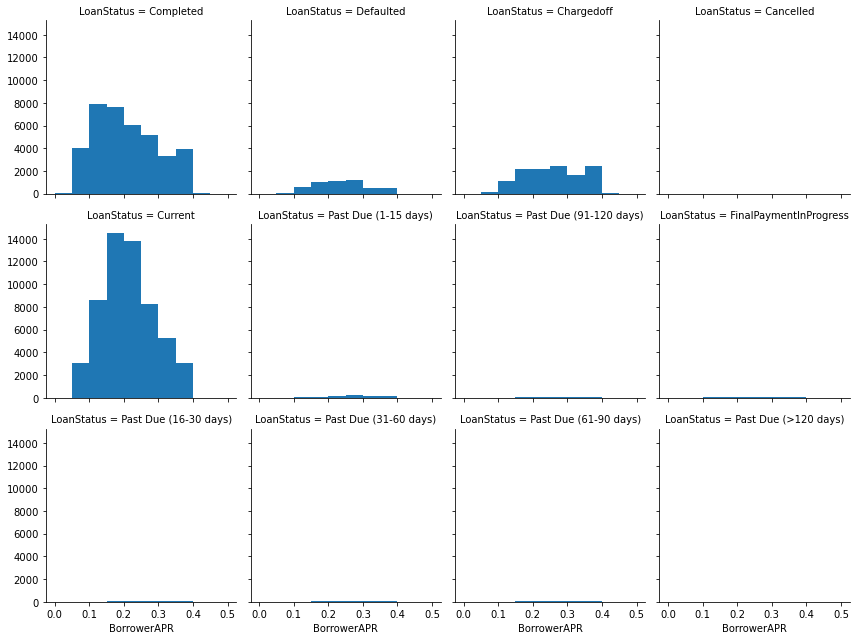

In [99]:
bin_edge=np.arange(0,0.5+0.05,.05)
g=sb.FacetGrid(data=df,col="LoanStatus",col_wrap=4)
g.map(plt.hist,"BorrowerAPR",bins=bin_edge);

> Past Due(16-30 days) has a highst frequency among the loan status 

#### 11: The relation between  Income Range and Term

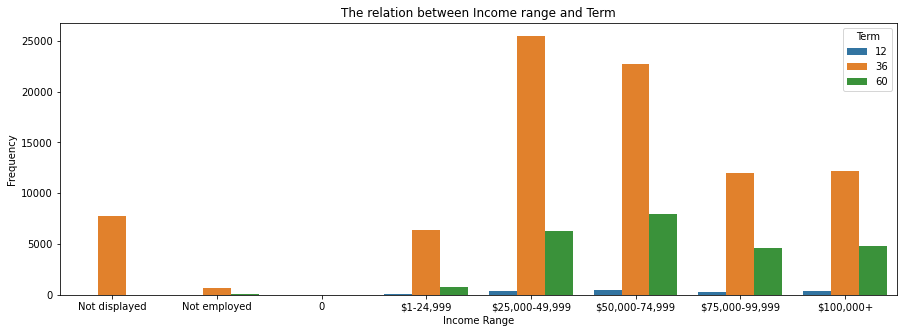

In [100]:
plt.figure(figsize=[15,5])

income_order=["Not displayed","Not employed","0","$1-24,999","$25,000-49,999","$50,000-74,999","$75,000-99,999","$100,000+"]

incoms=pd.api.types.CategoricalDtype(ordered=True,categories=income_order)
df["IncomeRange"]=df["IncomeRange"].astype(incoms)

sb.countplot(data=df,x="IncomeRange",hue="Term");

#labels and title
plt.xlabel("Income Range");
plt.ylabel("Frequency");
plt.title("The relation between Income range and Term");

> In all income ranges people prefered to take a loan with 36 months

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* When Borrower APR increase the lender yield increase also.
* Borrower APR has strongly negative relationship with prosper score
* 36 months loan term has the heighst frequency and wider Borrower APR range
* People prefer to take loan with 36 months term and it is not depend on the income range

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* Peoples take loan for Debt consolidation more than any category 
* Students take the lowest loan original amounts 
* People with high monthly rate taking high loans 

## Multivariate Exploration

Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### 1. The relation between Income Range & Loan Original Amount & Term

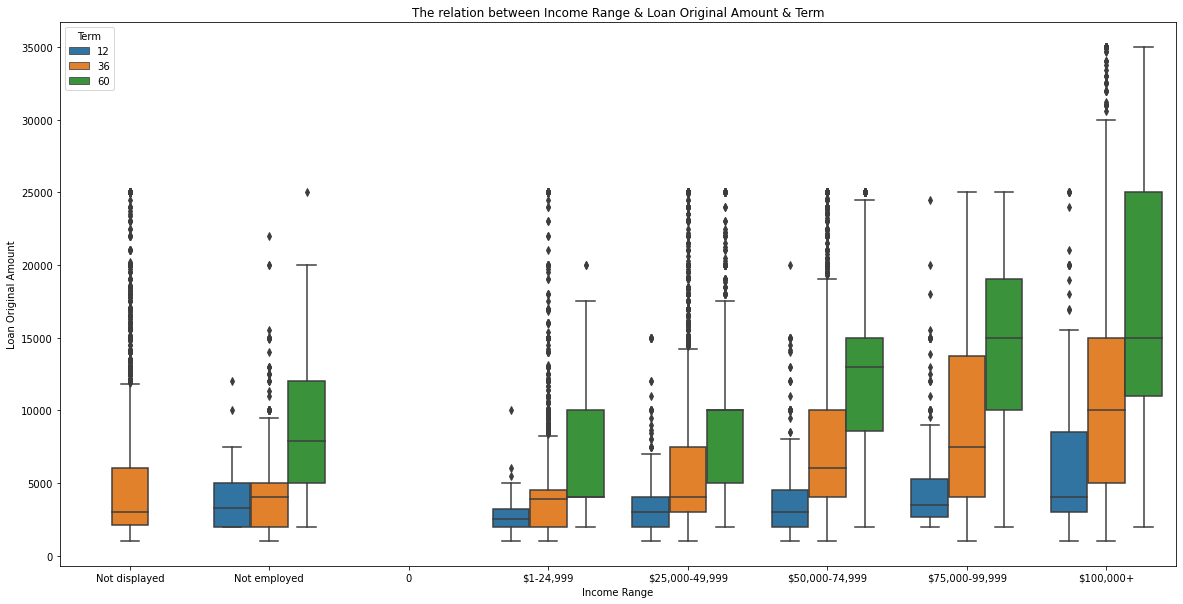

In [101]:
plt.figure(figsize=[20,10])
sb.boxplot(data=df,x="IncomeRange",y="LoanOriginalAmount",hue="Term");
plt.xlabel("Income Range");
plt.ylabel("Loan Original Amount");
plt.title("The relation between Income Range & Loan Original Amount & Term");

> It is very interesting in each income range when the loan original amount icreased the medina of 60 months term increase more than 12 and 36 months term medians 

#### 2: The relation between  Listing Category & Loan Original Amount & Term

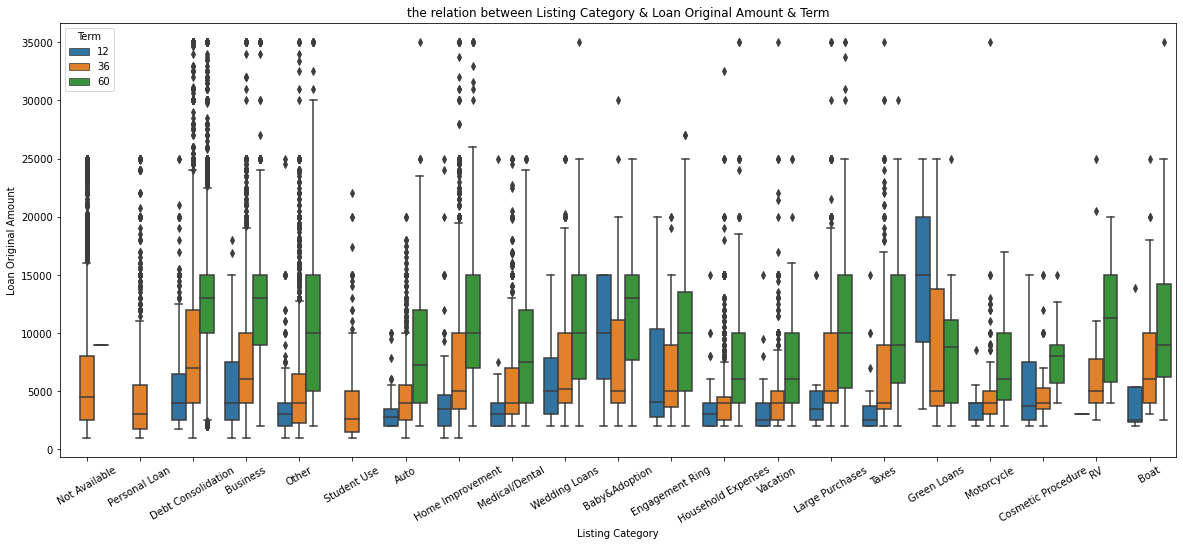

In [102]:
plt.figure(figsize=[20,8])
sb.boxplot(data=df,x="ListingCategory (numeric)",y="LoanOriginalAmount",hue="Term");
plt.xlabel("Listing Category");
plt.ylabel("Loan Original Amount");
plt.title("the relation between Listing Category & Loan Original Amount & Term");
plt.xticks(rotation =30);

> It is interesting because the median of 12 months term of green loans category is higher than other two terms

> The reange of 12 months term in cosmetic procedure is largest than the other two terms

>Personal loan and student use loan taking 36 months terms only

#### 3: The relation between Loan Status & Borrower APR & Employment Status

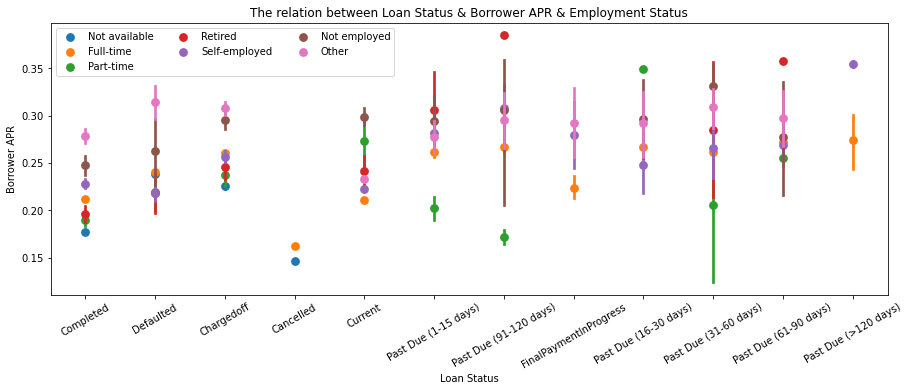

In [103]:
plt.figure(figsize=[15,5])
sb.pointplot(data=df,x="LoanStatus",y="BorrowerAPR",hue="EmploymentStatus",linestyles="");
plt.xticks(rotation =30);
plt.legend(ncol=3);

plt.ylabel("Borrower APR")
plt.xlabel("Loan Status");
plt.title("The relation between Loan Status & Borrower APR & Employment Status");

> From this graph we can note that when the loan status is past due(91-120 days) the retired employes had the highest borrower APR


>People with full time and part time jobs had a lower borrower APR in all loan status 


#### 4: The relation between Borrower APR & Lender Yield & ProsperScore

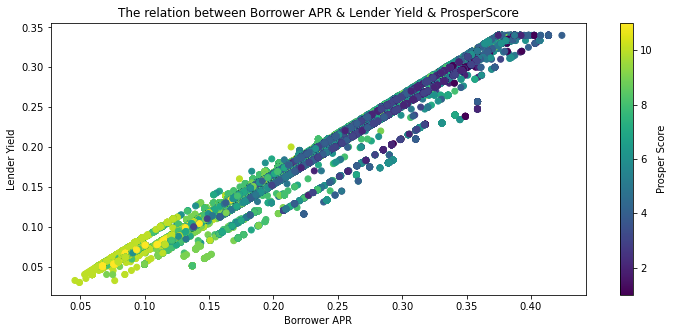

In [104]:
plt.figure(figsize=[12,5])
plt.scatter(data=df,x="BorrowerAPR",y = "LenderYield",c="ProsperScore")
plt.xlabel("Borrower APR")
plt.ylabel("Lender Yield");
plt.title("The relation between Borrower APR & Lender Yield & ProsperScore");
plt.colorbar(label="Prosper Score");

> The loans with higher Borrower APR and Lender yield had a lower prosper score.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relationships show that the loans with higher borrower APR and Lender yield tends to had a lower prosper sore

>People with full time and part time jobs had a lower borrower APR in all loan status 

### Were there any interesting or surprising interactions between features?

> In each income reange when the loan original amount icreased the medina of 60 months term increase more than 12 and 36 months term medians

>It is interesting because the median of 12 months term of green loans category is higher than other two terms

>The reange of 12 months term in cosmetic procedure is largest than the other two terms

>Personal loan and student use loan taking 36 months terms only

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.

In this Exploration we are looking into dataset that contains 113,937 propser loans with the following attributes: loan amount, borrower income, borrower rate ,borrower employment status. This will help us study the loans and the borrowers.The dataset shows that Propser is a lending platform where individuals can either invest or borrow loan. I started by looking at the following questions
Borrower data
Loan data
Credit Risk metrics.

I also explore the following:

I am interested in finding the relation between many variables for examble

The affect of the employment status and occupation and monthly salary to the loan amount
What are the factors leading to higher current delinquencies rate
Is there any relation between the customer risk score and the loan original amount

To better comprehend the data and attempt to identify the most appropriate answers to the key questions, I will study a variety of aspects. Credit Grade, Term, Loan Status, Borrower APR, Lender Yield, ProsperRating (Alpha), ProsperScore, Listing Category, Occupation, Employment Status, Employment Status Duration, Is Borrower Homeowner, Current Delinquencies, Income Range, Stated Monthly Income, Total Prosper Loans, Loan Original Amount, Loan Origination Quarter, and other variables as needed.